In [1]:
import pandas as pd
import graphviz
import seaborn as sn
import matplotlib.pylab as plt
import sklearn.tree
import IPython.display
import sklearn.preprocessing as skPrep

from sklearn.tree import DecisionTreeClassifier

Đọc dữ liệu từ tập dữ liệu đề bài

In [2]:
df = pd.read_csv("./nursery/nursery.data.csv")
df.columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12959 entries, 0 to 12958
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   12959 non-null  object
 1   has_nurs  12959 non-null  object
 2   form      12959 non-null  object
 3   children  12959 non-null  object
 4   housing   12959 non-null  object
 5   finance   12959 non-null  object
 6   social    12959 non-null  object
 7   health    12959 non-null  object
 8   class     12959 non-null  object
dtypes: object(9)
memory usage: 911.3+ KB


In [3]:
def DataSets(df, percentage = 0.6):
    data = df.sample(frac=1)

    train, test = data.iloc[:round(data.shape[0] * percentage), :], data.iloc[round(data.shape[0]*percentage) : , :]
    featureTrain, labelTrain = train.iloc[:, :-1], train.iloc[:, train.shape[1] - 1:]
    featureTest, labelTest = test.iloc[:, :-1], test.iloc[:, train.shape[1] - 1:]

    return featureTrain, labelTrain, featureTest, labelTest

In [4]:
def writeToCSV(featureTrain, labelTrain, featureTest, labelTest, percentage):
    pathFeatureTrain = f'./sample/{round(percentage*100)}_feature_train.csv'
    pathLabelTrain = f'./sample/{round(percentage*100)}_label_train.csv'
    pathFeatureTest = f'./sample/{round(percentage*100)}_feature_test.csv'
    pathLabelTest = f'./sample/{round(percentage*100)}_label_test.csv'

    featureTrain.to_csv(pathFeatureTrain, header = False, index = False)
    labelTrain.to_csv(pathLabelTrain, header = False, index = False)
    
    featureTest.to_csv(pathFeatureTest, header = False, index = False)
    labelTest.to_csv(pathLabelTest, header = False, index = False)


### Run random all Sample (run only ones)
Hàm chia dữ liệu và ghi lại vào file. Vì để thống nhất trong report và kết quả phía dưới nên hàm này được chạy 1 lần để tạo dữ liệu. Có thể chạy lại code bên dưới để lấy lại tập dữ liệu khác nhưng kết quả có thể xảy ra sai số so với trong report nhưng sẽ không nhiều.

In [5]:
# featureTrain, labelTrain, featureTest, labelTest = DataSets(df, 0.4)
# writeToCSV(featureTrain, labelTrain, featureTest, labelTest, 0.4)
# featureTrain, labelTrain, featureTest, labelTest = DataSets(df, 0.6)
# writeToCSV(featureTrain, labelTrain, featureTest, labelTest, 0.6)
# featureTrain, labelTrain, featureTest, labelTest = DataSets(df, 0.8)
# writeToCSV(featureTrain, labelTrain, featureTest, labelTest, 0.8)
# featureTrain, labelTrain, featureTest, labelTest = DataSets(df, 0.9)
# writeToCSV(featureTrain, labelTrain, featureTest, labelTest, 0.9)

Hàm đọc dữ liệu với tỉ lệ là tham số được truyền vào, trả về kết quả là các tập dữ liệu feature_train, label_train, feature_test, label_test tương ứng với tỉ lệ được truyền vào

In [6]:
def readSampleFile(percentage = 0.4):
    pathFeatureTrain = f'./sample/{round(percentage*100)}_feature_train.csv'
    pathLabelTrain = f'./sample/{round(percentage*100)}_label_train.csv'
    pathFeatureTest = f'./sample/{round(percentage*100)}_feature_test.csv'
    pathLabelTest = f'./sample/{round(percentage*100)}_label_test.csv'

    featureTrain = pd.read_csv(pathFeatureTrain)
    labelTrain = pd.read_csv(pathLabelTrain)
    featureTest = pd.read_csv(pathFeatureTest)
    labelTest = pd.read_csv(pathLabelTest)

    featureTrain.columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health']
    labelTrain.columns = ['class']
    featureTest.columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health']
    labelTest.columns = ['class']

    return featureTrain, labelTrain, featureTest, labelTest 

Hàm trực quan dữ liệu theo cột

In [7]:
def visualizationSample(percentage = 0.4):
    featureTrain, labelTrain, featureTest, labelTest = readSampleFile(percentage)

    plt.title(f'Percentage: {round(featureTrain.shape[0] / (featureTest.shape[0] + featureTrain.shape[0]) * 100)}%')
    x_set = ["Overall", "Feature Train", "Label Train", "Feature Test", "Label Test"]
    y_set = [df.shape[0], featureTrain.shape[0], labelTrain.shape[0], featureTest.shape[0], labelTest.shape[0]]
    plt.ylabel('Number of elements')
    plt.xlabel("Data sets")
    plt.bar(x = x_set, height = y_set)
    plt.show()

### Trực quan dữ liệu với tỉ lệ 40 / 60

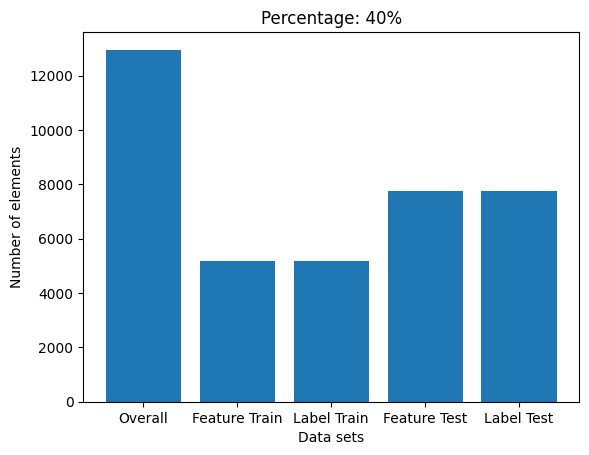

In [8]:
visualizationSample(0.4)

### Trực quan dữ liệu với tỉ lệ 60 / 40

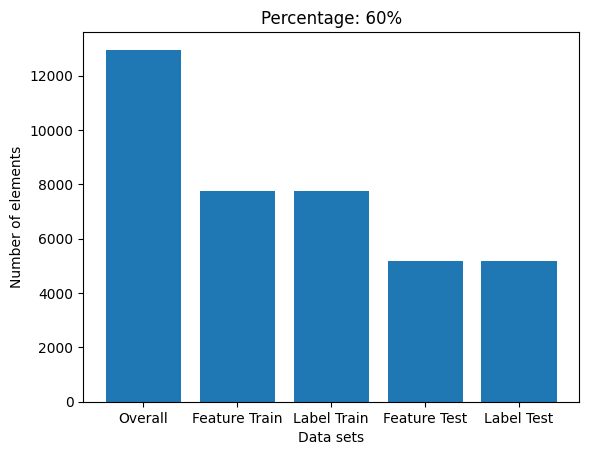

In [9]:
visualizationSample(0.6)

### Trực quan dữ liệu với tỉ lệ 80 / 20

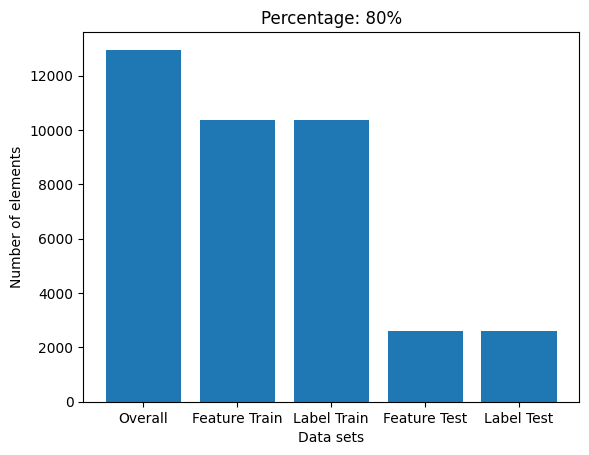

In [10]:
visualizationSample(0.8)

### Trực quan dữ liệu với tỉ lệ 90 / 10

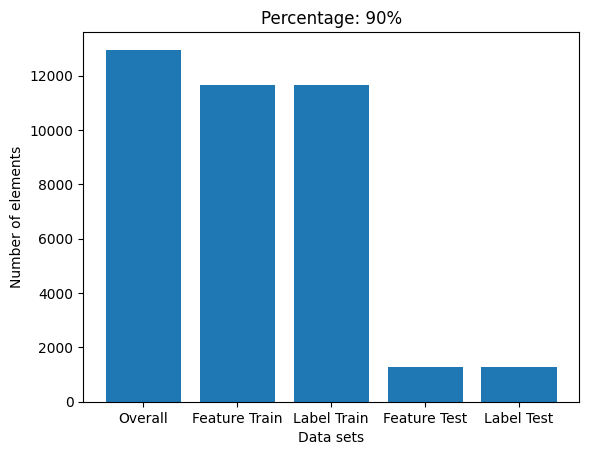

In [11]:
visualizationSample(0.9)

Hàm xây dựng model DecisionTreeClassifier với tham số các tập dữ liệu train và độ sâu (defalt = None)

In [12]:
def DecionTreeModel(featureTrain, labelTrain, maxDepth = None):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=maxDepth)
    encoder = skPrep.OrdinalEncoder()
    encoderData = encoder.fit_transform(featureTrain)
    clf.fit(encoderData, labelTrain)

    return clf

Hàm trực quan đồ thị từ mô hình cây được train.

In [13]:
def visualizeGraphviz(tree, feature):
    dot_data = sklearn.tree.export_graphviz(tree, feature_names=feature
                                        , class_names = tree.classes_
                                        , out_file=None, filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data, format = "png")
    IPython.display.display(graph)

    return graph

Hàm tạo classification report

In [14]:
def createClassificationReport(clf, featureTest, labelTest):
    encoder = skPrep.OrdinalEncoder()
    encoderData = encoder.fit_transform(featureTest)
    
    y_predict = clf.predict(encoderData)
    classification_report = sklearn.metrics.classification_report(y_true=labelTest, y_pred=y_predict)
    return classification_report

Hàm trực quan hóa confusion matrix

In [15]:
def visualizaConfusionMatrix(clf, featureTest, labelTest):
    encoder = skPrep.OrdinalEncoder()
    encoderData = encoder.fit_transform(featureTest)
    
    y_predict = clf.predict(encoderData)
    confusionMatrix = sklearn.metrics.confusion_matrix(y_true=labelTest, y_pred=y_predict, labels = clf.classes_)
    sn.heatmap(confusionMatrix, annot=True)
    plt.show()
    return confusionMatrix

Hàm chạy với mẫu dữ liệu, tham số nhận vào là tỉ lệ của mẫu dữ liệu (default = 40 / 60)

In [16]:
def runSample(percentage = 0.4):
    featureTrain, labelTrain, featureTest, labelTest = readSampleFile(percentage)

    clf = DecionTreeModel(featureTrain, labelTrain)
    graph = visualizeGraphviz(clf, featureTrain.columns)
    graph.render(f'./graph/{int(percentage*100)}_sample')
    classificationReport = createClassificationReport(clf, featureTest, labelTest)
    confusionMatrix = visualizaConfusionMatrix(clf, featureTest, labelTest)

    print(classificationReport)
    print(confusionMatrix)
    return clf

### Kết quả khi chạy bộ dữ liệu 40 / 60

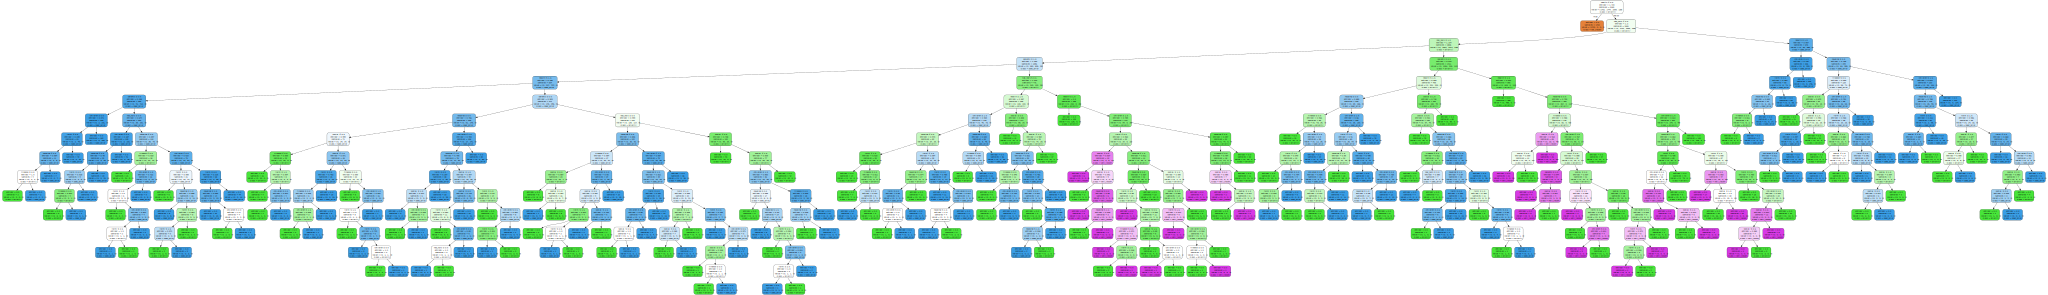


(process:6872): GLib-GIO-WARNING **: 19:27:57.487: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.727.100_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs

(process:6872): GLib-GIO-WARNING **: 19:27:57.500: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2305.26.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:6872): GLib-GIO-WARNING **: 19:27:57.505: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.7.7.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

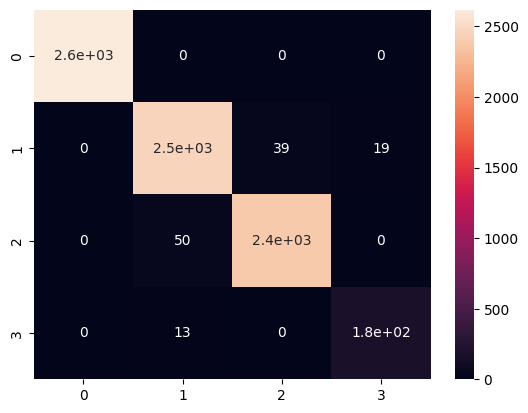

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00      2618
    priority       0.98      0.98      0.98      2522
   recommend       0.00      0.00      0.00         1
  spec_prior       0.98      0.98      0.98      2443
  very_recom       0.90      0.93      0.91       190

    accuracy                           0.98      7774
   macro avg       0.77      0.78      0.77      7774
weighted avg       0.98      0.98      0.98      7774

[[2618    0    0    0]
 [   0 2464   39   19]
 [   0   50 2393    0]
 [   0   13    0  177]]


DecisionTreeClassifier(criterion='entropy')

In [17]:
runSample(0.4)

### Kết quả khi chạy bộ dữ liệu 60 / 40

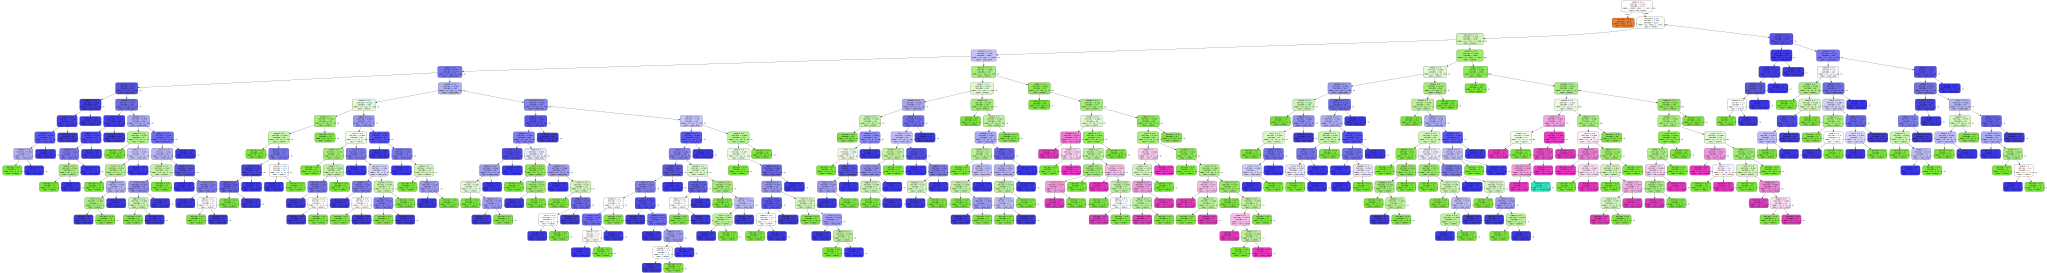


(process:5540): GLib-GIO-WARNING **: 19:28:02.425: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.727.100_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs

(process:5540): GLib-GIO-WARNING **: 19:28:02.439: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2305.26.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:5540): GLib-GIO-WARNING **: 19:28:02.444: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.7.7.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

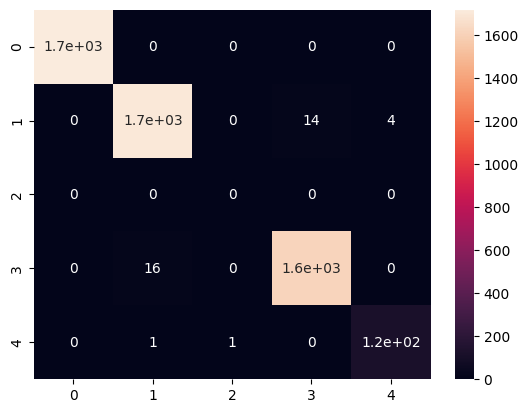

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00      1717
    priority       0.99      0.99      0.99      1719
   recommend       0.00      0.00      0.00         0
  spec_prior       0.99      0.99      0.99      1630
  very_recom       0.97      0.98      0.97       117

    accuracy                           0.99      5183
   macro avg       0.79      0.79      0.79      5183
weighted avg       0.99      0.99      0.99      5183

[[1717    0    0    0    0]
 [   0 1701    0   14    4]
 [   0    0    0    0    0]
 [   0   16    0 1614    0]
 [   0    1    1    0  115]]


DecisionTreeClassifier(criterion='entropy')

In [18]:
runSample(0.6)

### Kết quả khi chạy bộ dữ liệu 80 / 20

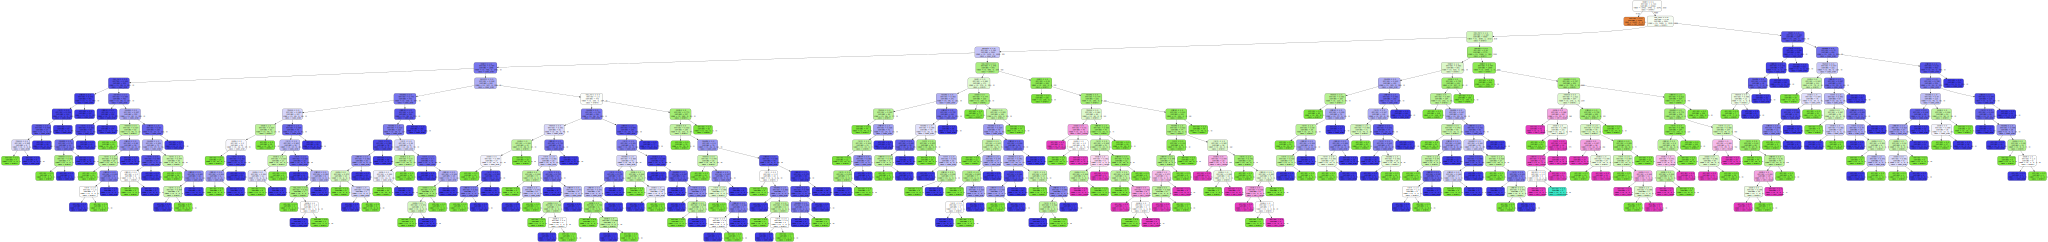


(process:6388): GLib-GIO-WARNING **: 19:28:07.659: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.727.100_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs

(process:6388): GLib-GIO-WARNING **: 19:28:07.676: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2305.26.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:6388): GLib-GIO-WARNING **: 19:28:07.682: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.7.7.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

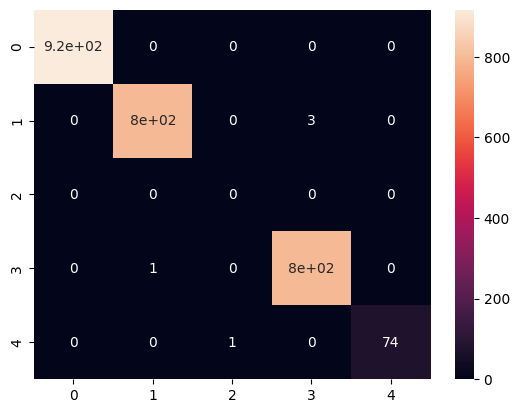

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       917
    priority       1.00      1.00      1.00       801
   recommend       0.00      0.00      0.00         0
  spec_prior       1.00      1.00      1.00       798
  very_recom       1.00      0.99      0.99        75

    accuracy                           1.00      2591
   macro avg       0.80      0.80      0.80      2591
weighted avg       1.00      1.00      1.00      2591

[[917   0   0   0   0]
 [  0 798   0   3   0]
 [  0   0   0   0   0]
 [  0   1   0 797   0]
 [  0   0   1   0  74]]


DecisionTreeClassifier(criterion='entropy')

In [19]:
runSample(0.8)

### Kết quả khi chạy bộ dữ liệu 90 / 10

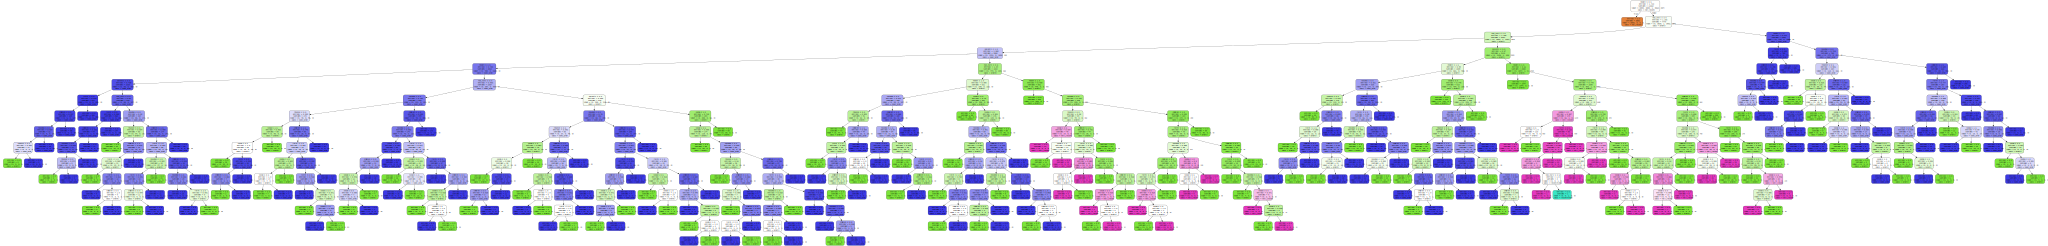


(process:3920): GLib-GIO-WARNING **: 19:28:12.189: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.727.100_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs

(process:3920): GLib-GIO-WARNING **: 19:28:12.202: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2305.26.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:3920): GLib-GIO-WARNING **: 19:28:12.206: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.7.7.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs


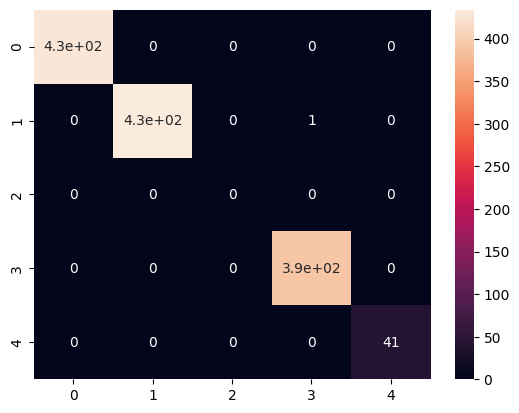

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       428
    priority       1.00      1.00      1.00       435
  spec_prior       1.00      1.00      1.00       391
  very_recom       1.00      1.00      1.00        41

    accuracy                           1.00      1295
   macro avg       1.00      1.00      1.00      1295
weighted avg       1.00      1.00      1.00      1295

[[428   0   0   0   0]
 [  0 434   0   1   0]
 [  0   0   0   0   0]
 [  0   0   0 391   0]
 [  0   0   0   0  41]]


DecisionTreeClassifier(criterion='entropy')

In [20]:
runSample(0.9)

Hàm lấy giá trị accuracy score với tham số là độ sâu (default = None)

In [21]:
def getAccuracyScore(maxDepth = None):
    featureTrain, labelTrain, featureTest, labelTest = readSampleFile(0.8)
    clf = DecionTreeModel(featureTrain, labelTrain, maxDepth = maxDepth)
    graph = visualizeGraphviz(clf, featureTrain.columns)
    graph.render(f'./depth/grapth_max_depth_{clf.get_depth()}')

    encoder = skPrep.OrdinalEncoder()
    encoderData = encoder.fit_transform(featureTest)
    accuracyScore = sklearn.metrics.accuracy_score(labelTest, clf.predict(encoderData))
    
    return clf, accuracyScore

### Trực quan hóa cây, accuracy score với độ sâu lần lượt là 2, 3, 4, 5, 6, 7, None

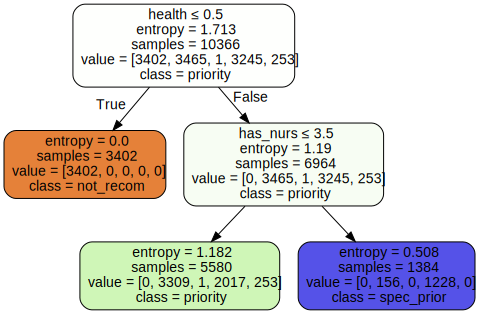

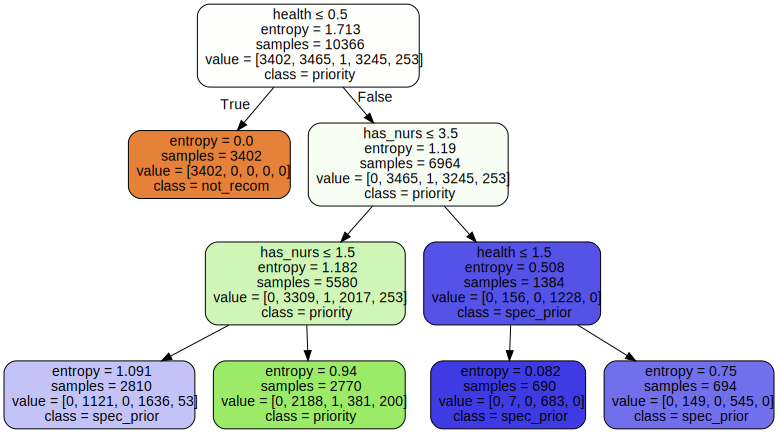

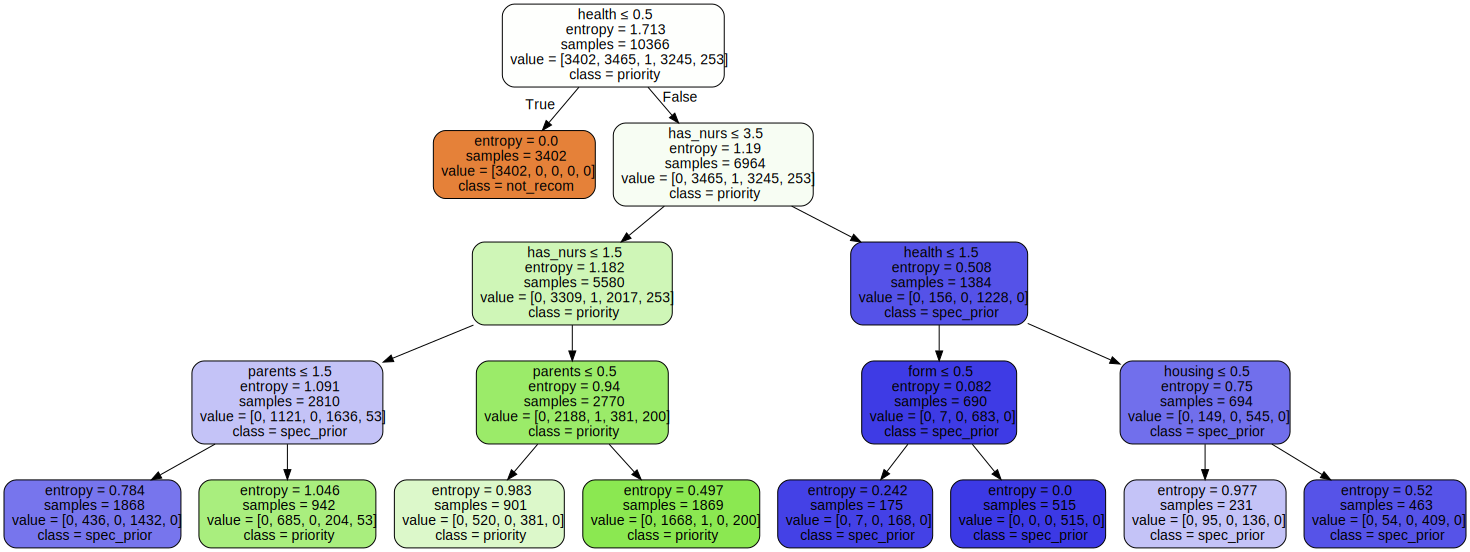

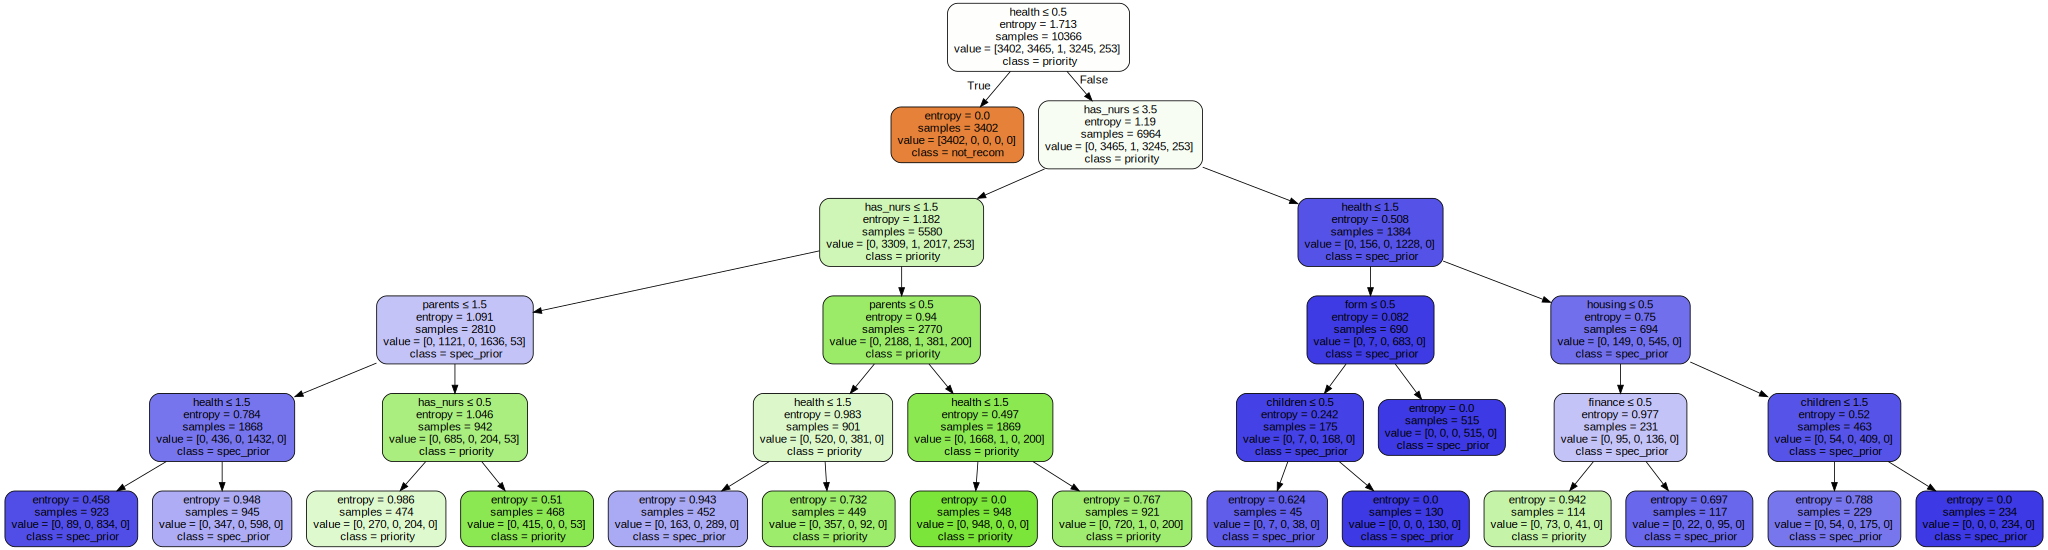

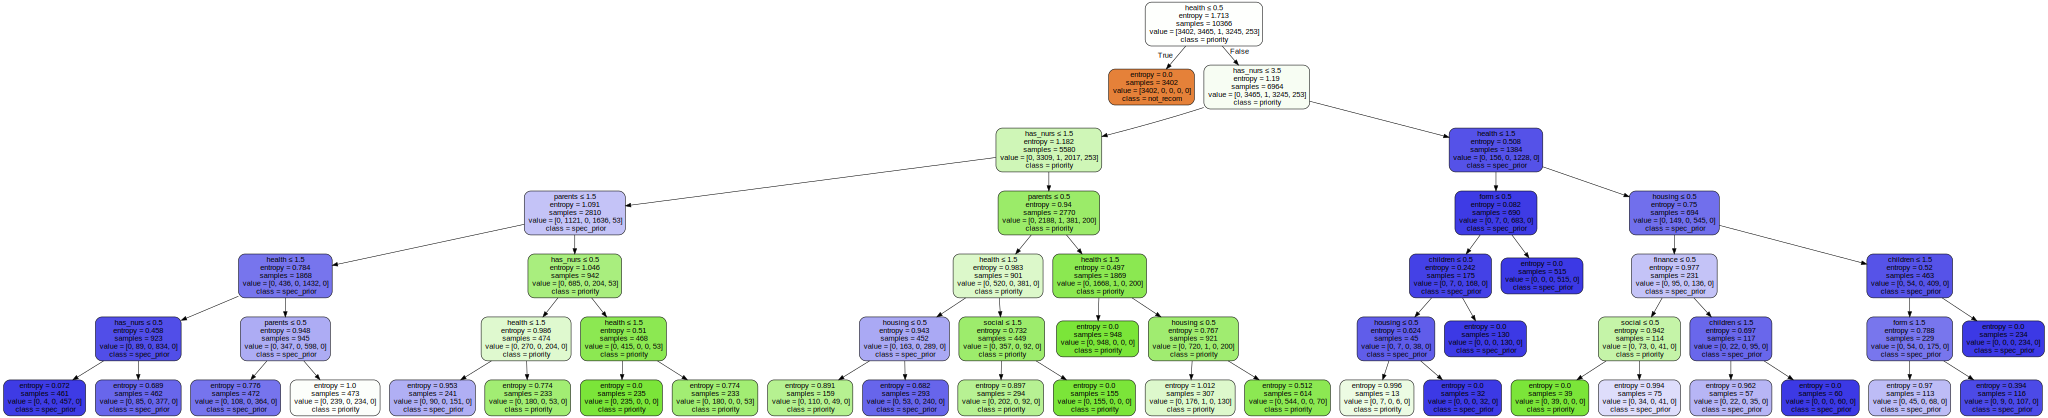

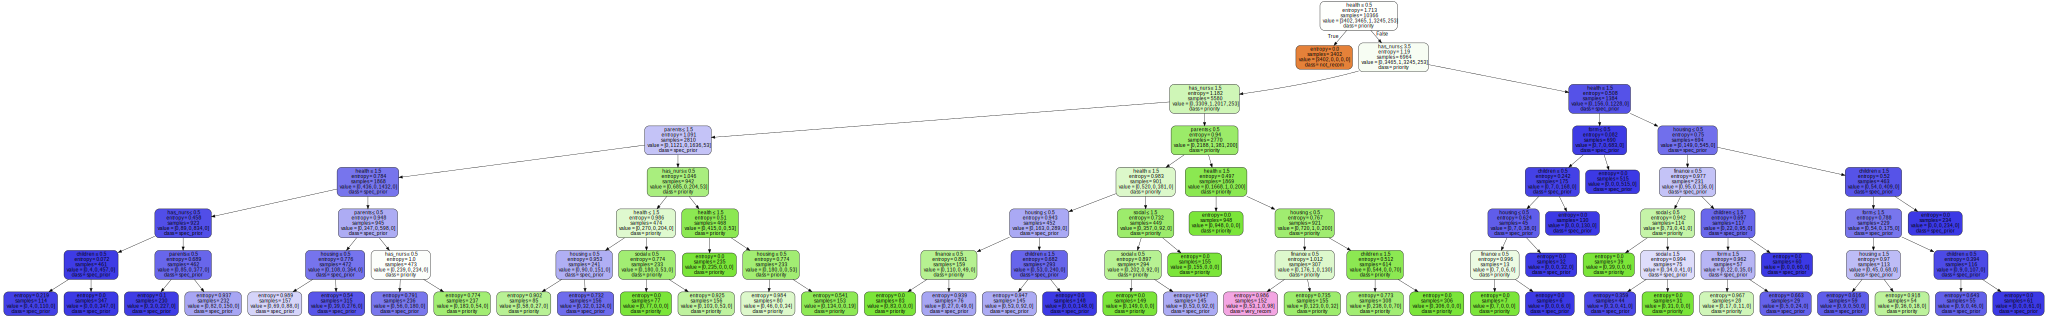

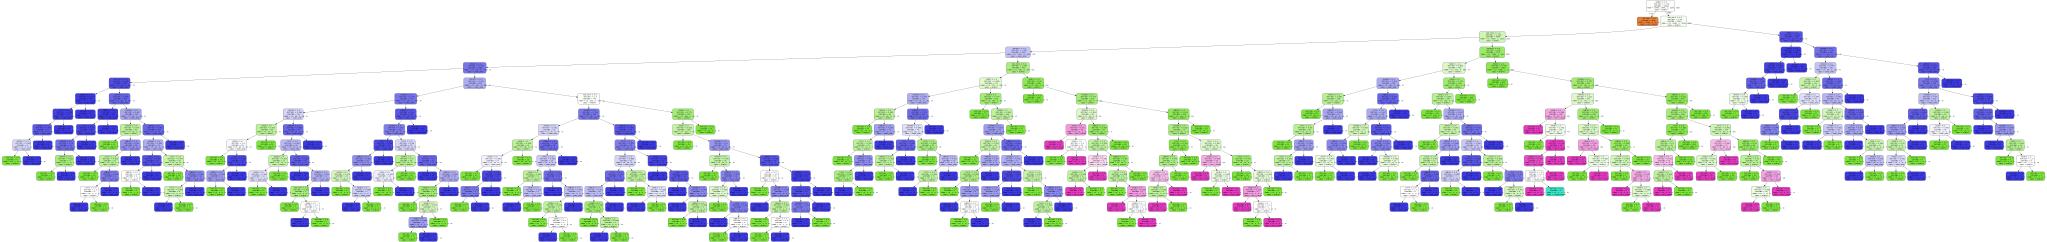


(process:1948): GLib-GIO-WARNING **: 19:28:21.040: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.727.100_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs

(process:1948): GLib-GIO-WARNING **: 19:28:21.055: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2305.26.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:1948): GLib-GIO-WARNING **: 19:28:21.058: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.7.7.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs


Max Depth:  [2, 3, 4, 5, 6, 7, 15]
Accuracy Score:  [0.7537630258587418, 0.8074102663064454, 0.8463913546893091, 0.8757236588189888, 0.882284832111154, 0.9258973369355461, 0.9965264376688537]


In [22]:
x_plot = []
y_plot = []
for i in range(2, 8):
    clf, accuracyScore = getAccuracyScore(i)
    x_plot.append(clf.get_depth())
    y_plot.append(accuracyScore)

clf, accuracyScore = getAccuracyScore()
x_plot.append(clf.get_depth())
y_plot.append(accuracyScore)

print("Max Depth: ", x_plot)
print("Accuracy Score: ", y_plot)

### Trực quan hóa mối tương quan giữa accuracy score và độ sâu

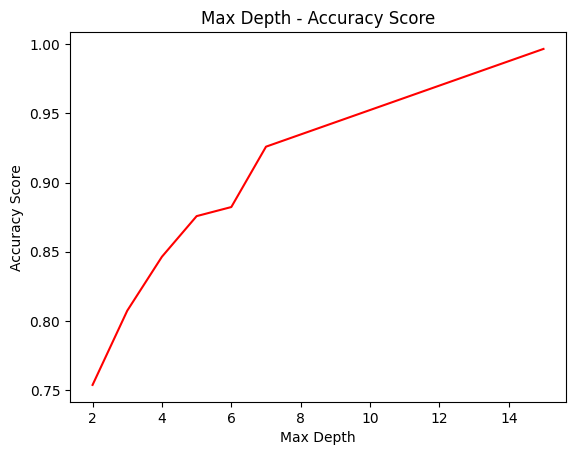

In [23]:
plt.title("Max Depth - Accuracy Score")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.plot(x_plot, y_plot, 'red')
plt.show()